### POSTTEST 5
## Angelita Catrin
## 2109106145
# C 2

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score

In [4]:
df = pd.read_csv('tourist-departures.csv')
df

,Entity,Code,Year,Outbound departures (tourists) per 1000 people,"GDP per capita, PPP (constant 2017 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1280.4631,NaN
2,Afghanistan,AFG,2003,NaN,1292.3335,NaN
3,Afghanistan,AFG,2004,NaN,1260.0605,NaN
4,Afghanistan,AFG,2005,NaN,1352.3207,NaN
...,...,...,...,...,...,...
5490,Zimbabwe,ZWE,2016,220.858300,2286.6235,NaN
5491,Zimbabwe,ZWE,2017,187.647000,2331.7808,NaN
5492,Zimbabwe,ZWE,2018,152.004460,2399.6216,NaN
5493,Zimbabwe,ZWE,2019,213.291050,2203.3967,NaN


In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer1 = SimpleImputer(strategy="most_frequent")
df["Code"] = imputer1.fit_transform(df[["Code"]])
df.isna().sum()

Entity                                                    0
Code                                                      0
Year                                                      0
Outbound departures (tourists) per 1000 people         3343
GDP per capita, PPP (constant 2017 international $)     237
Continent                                              5210
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
imputer2 = SimpleImputer(strategy="mean")
df["Outbound departures (tourists) per 1000 people"] = imputer2.fit_transform(df[["Outbound departures (tourists) per 1000 people"]])
df.isna().sum()

Entity                                                    0
Code                                                      0
Year                                                      0
Outbound departures (tourists) per 1000 people            0
GDP per capita, PPP (constant 2017 international $)     237
Continent                                              5210
dtype: int64

In [9]:
imputer3 = SimpleImputer(strategy="median")
df["GDP per capita, PPP (constant 2017 international $)"] = imputer3.fit_transform(df[["GDP per capita, PPP (constant 2017 international $)"]])
df.isna().sum()

Entity                                                    0
Code                                                      0
Year                                                      0
Outbound departures (tourists) per 1000 people            0
GDP per capita, PPP (constant 2017 international $)       0
Continent                                              5210
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
svm = SVC(kernel="rbf")

In [14]:
angka = pd.read_csv("tourist-departures.csv")

angka["GDP per capita, PPP (constant 2017 international $)"].dtypes

dtype('float64')

In [15]:
tipe_baru = angka[["GDP per capita, PPP (constant 2017 international $)"]].astype("object")
tipe_baru["GDP per capita, PPP (constant 2017 international $)"].dtypes

dtype('O')

## Linear Regresion

In [25]:
X, y = df[['Year']], df['GDP per capita, PPP (constant 2017 international $)']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [27]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

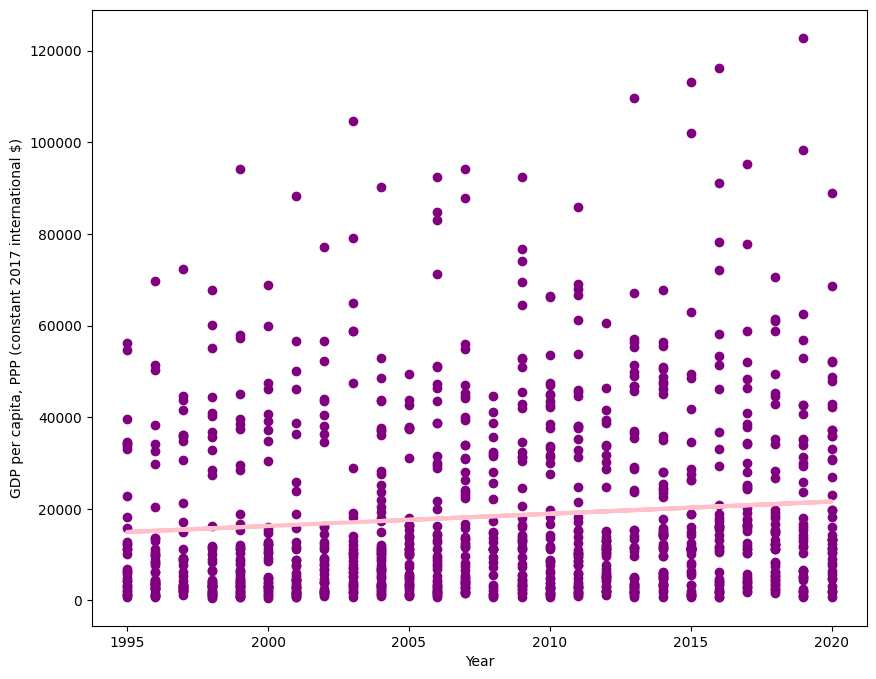

In [28]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='pink', linewidth=3)
plt.scatter(X_test, y_test, c='purple')
plt.xlabel("Year")
plt.ylabel("GDP per capita, PPP (constant 2017 international $)")
plt.show()

In [16]:
X = df[['Year', 'GDP per capita, PPP (constant 2017 international $)']]
y = df['Outbound departures (tourists) per 1000 people']

In [18]:
X = df[["Year", "GDP per capita, PPP (constant 2017 international $)"]]
K = 2

## K-Means

In [19]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [20]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

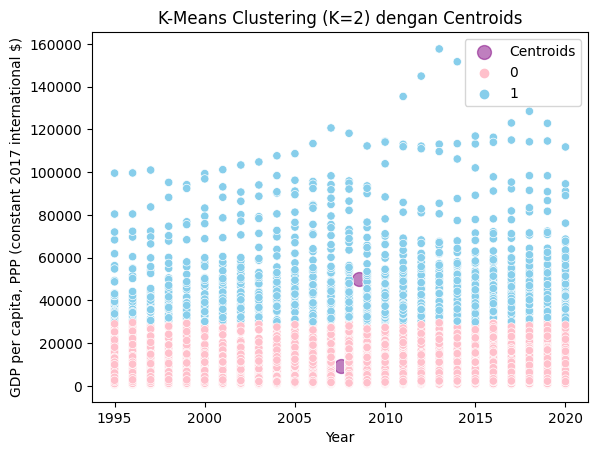

In [21]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='purple', s=100, label='Centroids')
sns.scatterplot(data=df, x="Year", y="GDP per capita, PPP (constant 2017 international $)", hue="cluster", palette=["pink", "skyblue"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Year")
plt.ylabel("GDP per capita, PPP (constant 2017 international $)")
plt.legend()
plt.show()